In [1]:
from glob import glob
import h5py
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
import matplotlib as mpl
rcParams['figure.figsize'] = [20,15]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 80

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
directory = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/'

In [4]:
h5_files = glob(os.path.join(directory,'**/*.h5'))

In [5]:
h5_files

['/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/1441__psfstack_sci.h5',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1386/1386__psfstack_sci.h5']

In [6]:
data_1441 = h5py.File(h5_files[0],'r')
data_1386 = h5py.File(h5_files[1],'r')

In [7]:
keys = [x for x in data_1386.keys()]

In [8]:
final_ = np.concatenate((np.array(data_1386[keys[0]]),np.array(data_1386[keys[1]])))

for i in range(len(keys)-2):
    
    final_ = np.concatenate((final_,np.array(data_1386[keys[i+2]])))
    
final_.shape

(126, 320, 320)

In [9]:
flatten_final = np.resize(final_, (126,320*320))
flatten_final.shape

(126, 102400)

In [10]:
def pca_func(flatten_final,ncols=10):
    
    pca = PCA(.95)
    lower_dimensional_data = pca.fit_transform(flatten_final)
    approximation = pca.inverse_transform(lower_dimensional_data)
    
    return approximation
    

In [11]:
def visualize_pca(flatten_final, approximation, ncols=10):
    substract = np.abs(flatten_final - approximation)
    #subs_mean = np.mean(substract,axis=0)
    
    _, axes = plt.subplots(nrows=3,ncols=ncols,figsize=(20,8))
    
    for idx in range(ncols):
        
        rand_num = np.random.randint(0,126)
        #print(rand_num)
        
        
        axes[0][idx].imshow(flatten_final[rand_num].reshape(320, 320),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
        axes[1][idx].imshow(approximation[rand_num].reshape(320, 320),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
    
        axes[2][idx].imshow(np.sinh(substract[rand_num]).reshape(320, 320),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
        
        if idx == 0:
            
            axes[0][idx].set_ylabel('Original',fontsize=10,fontweight='bold')
            axes[1][idx].set_ylabel('Reconstructed',fontsize=10,fontweight='bold')
            axes[2][idx].set_ylabel('Subtracted',fontsize=10,fontweight='bold')
            
        axes[0][idx].set_yticks([])
        axes[0][idx].set_xticks([])
        
        axes[1][idx].set_yticks([])
        axes[1][idx].set_xticks([])
        
        axes[2][idx].set_yticks([])
        axes[2][idx].set_xticks([])
        
    plt.subplots_adjust(wspace=0,hspace=0)
    _.patch.set_facecolor('#423f3b')
    plt.show()
    

In [12]:
approx = pca_func(flatten_final)


/tmp/ipykernel_131852/3494179849.py:20: RuntimeWarning: overflow encountered in sinh
  axes[2][idx].imshow(np.sinh(substract[rand_num]).reshape(320, 320),


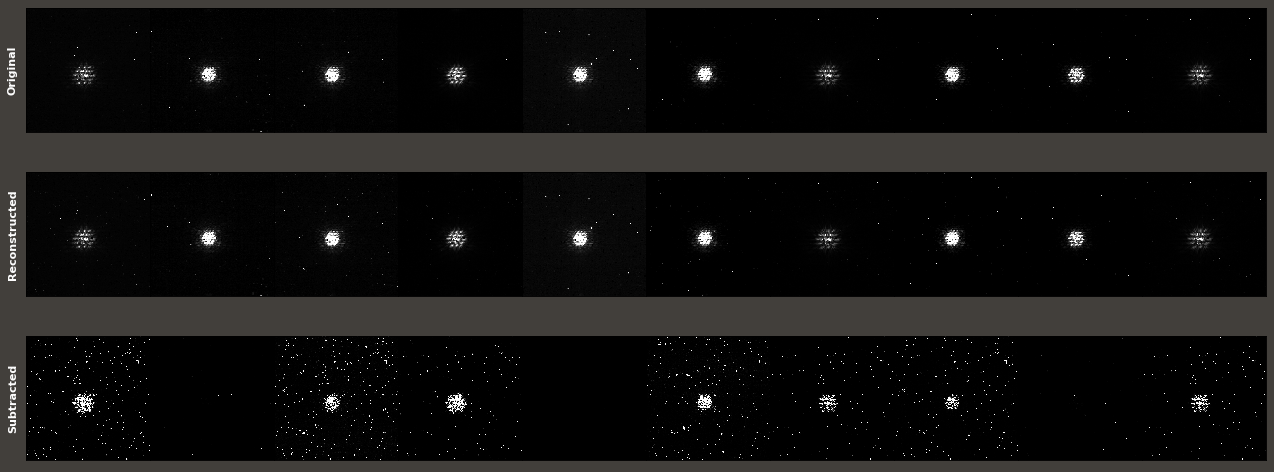

In [13]:
visualize_pca(flatten_final, approx)
    

In [ ]:
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.tick_right()
plt.plot([2,3,4,5])
plt.show()

Formula:   (   Pixel Size   /   Telescope Focal Length   )   X 206.265

In [32]:
def pixel_to_arcsec(axis_length):
    x = 1 / 0.031 
    
    zero_point = axis_length / 2
    pos_current_point = zero_point
    neg_current_point = zero_point
    
    arcsec_axis_points = [zero_point]

    while (pos_current_point + x) < axis_length:
        pos_current_point += x
        neg_current_point -= x
        print(pos_current_point)
        arcsec_axis_points.append(pos_current_point)
        arcsec_axis_points.append(neg_current_point)
    
    
    
    return arcsec_axis_points
        

In [33]:
x_axis_points = pixel_to_arcsec(320)

192.25806451612902
224.51612903225805
256.7741935483871
289.0322580645161


In [35]:
x_axis_points.sort()

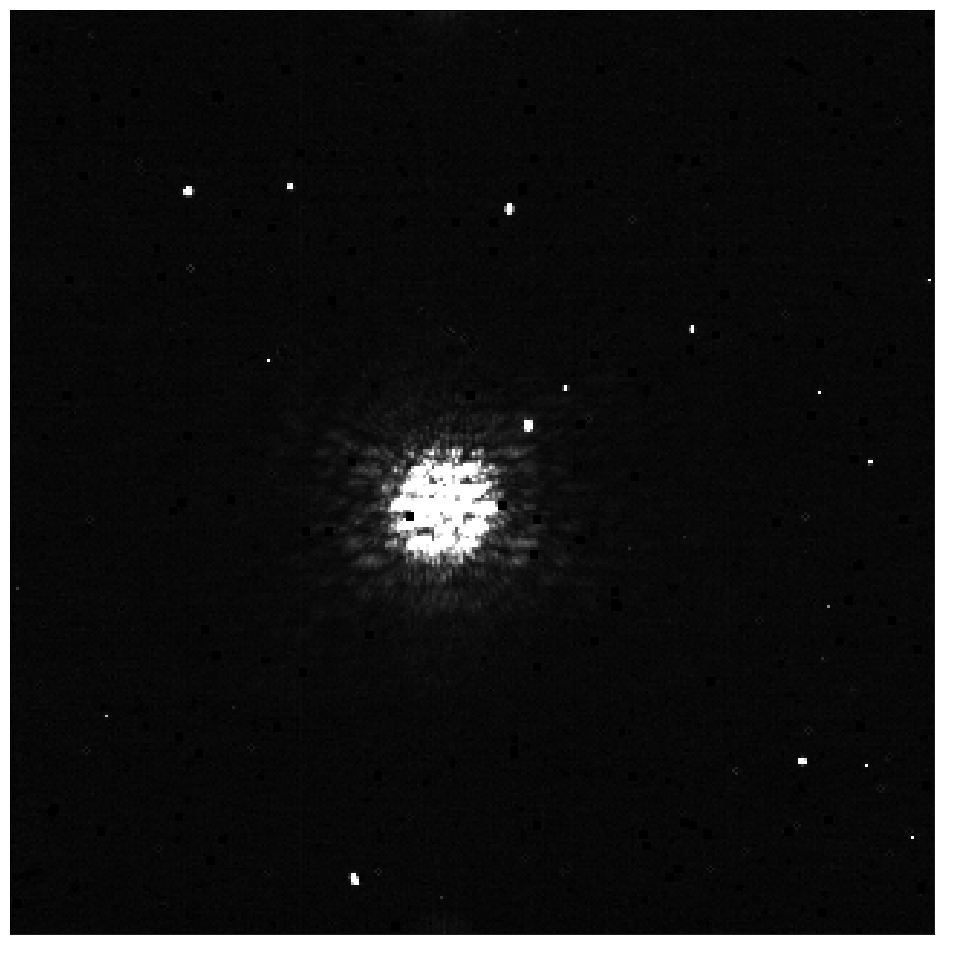

In [22]:
figure = plt.figure()
ax = figure.add_subplot(111)
ax.yaxis.tick_right()
ax.imshow(final_[0],
           cmap = plt.cm.gray, interpolation='nearest',
            clim=(0, 255))

x_axis_points = pixel_to_arcsec(320)
y_axis_points = pixel_to_arcsec(320)

ax.set_yticks(axis_points,y_labels,rotation=45)
ax.set_xticks(axis_points,x_labels,rotation=70)